In [ ]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-9-3a43951475e1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], test_size=0.3)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
8,4.4,2.9,1.4,0.2
6,4.6,3.4,1.4,0.3
90,5.5,2.6,4.4,1.2
...,...,...,...,...
121,5.6,2.8,4.9,2.0
140,6.7,3.1,5.6,2.4
89,5.5,2.5,4.0,1.3
142,5.8,2.7,5.1,1.9


In [ ]:
y_train

,Species
45,1
118,3
8,1
6,1
90,2
...,...
121,3
140,3
89,2
142,3


In [ ]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120)

In [ ]:
lr_predictions = mymodel.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

In [ ]:

print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")
print(f"Logistic Regression Recall: {lr_recall}")
print(f"Logistic Regression F1 Score: {lr_f1}")

Logistic Regression Accuracy: 0.9555555555555556
Logistic Regression Precision: 0.9611111111111111
Logistic Regression Recall: 0.9555555555555556
Logistic Regression F1 Score: 0.955648148148148


In [ ]:
mymodel.predict(X_test)

array([2, 2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 1, 3, 2, 1, 3, 3, 1,
       2, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 3, 3, 2, 3, 1, 1, 3, 3,
       3])

In [ ]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
64,5.6,2.9,3.6,1.3
86,6.7,3.1,4.7,1.5
23,5.1,3.3,1.7,0.5
138,6.0,3.0,4.8,1.8
12,4.8,3.0,1.4,0.1
91,6.1,3.0,4.6,1.4
61,5.9,3.0,4.2,1.5
126,6.2,2.8,4.8,1.8
74,6.4,2.9,4.3,1.3
40,5.0,3.5,1.3,0.3


In [ ]:
mymodel.score(X_test, y_test)

0.9555555555555556

In [ ]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([2, 2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 1, 3, 2, 1, 3, 3, 1,
       2, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 3, 3, 2, 3, 1, 1, 3, 3,
       3])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

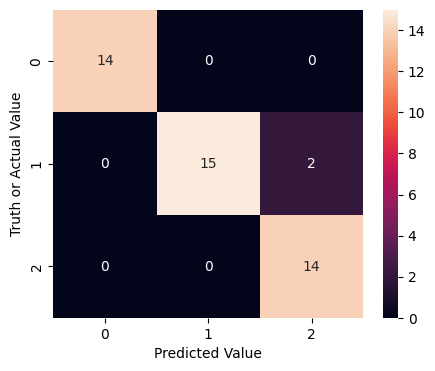

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [ ]:
# SVM model
svm_model = SVC()


In [ ]:
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
svm_predictions = svm_model.predict(X_test)


In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(svm_accuracy)

0.9111111111111111


In [ ]:
!pip install scikit-learn #Install scikit-learn if you haven't already
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary functions

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

In [ ]:

print(svm_accuracy)
print(svm_precision)
print( svm_recall)
print(svm_f1)

0.9111111111111111
0.9144249512670565
0.9111111111111111
0.9101614434947768


In [ ]:
# Decision Tree model
dt_model = DecisionTreeClassifier()


In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
dt_predictions = dt_model.predict(X_test)


In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(dt_accuracy)

0.9333333333333333


In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')


In [ ]:
print(dt_accuracy)
print(dt_precision)
print(dt_recall)
print(dt_f1)

0.9333333333333333
0.9349074074074074
0.9333333333333333
0.9334726576105885


In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.84      0.94      0.89        17
           3       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.88      0.94        17
           3       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17
           3       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

